In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [53]:
data = pd.read_csv("cftr.csv")
data

,gnomAD ID,Chromosome,Position,rsIDs,Reference,Alternate,Source,Filters - exomes,Filters - genomes,Transcript,...,Homozygote Count Amish,Hemizygote Count Amish,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Allele Count Remaining,Allele Number Remaining,Homozygote Count Remaining,Hemizygote Count Remaining
0,7-117715930-G-A,7,117715930,rs188471091,G,A,gnomAD Genomes,NaN,PASS,ENST00000600166.1,...,0,0,0,4810,0,0,8,2116,2,0
1,7-117715928-G-A,7,117715928,rs1333190415,G,A,gnomAD Genomes,NaN,PASS,ENST00000600166.1,...,0,0,0,4830,0,0,0,2094,0,0
2,7-117715922-G-A,7,117715922,rs1216627871,G,A,gnomAD Genomes,NaN,PASS,ENST00000600166.1,...,0,0,0,4820,0,0,0,2092,0,0
3,7-117715920-TAGG-T,7,117715920,rs1008102717,TAGG,T,gnomAD Genomes,NaN,PASS,ENST00000600166.1,...,0,0,0,4802,0,0,0,2088,0,0
4,7-117715909-T-A,7,117715909,rs891020147,T,A,gnomAD Genomes,NaN,PASS,ENST00000600166.1,...,0,0,0,4820,0,0,0,2118,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,7-117480029-T-C,7,117480029,rs1797974971,T,C,"gnomAD Exomes,gnomAD Genomes",PASS,PASS,ENST00000003084.11,...,0,0,0,87626,0,0,0,56670,0,0
5879,7-117480028-G-A,7,117480028,NaN,G,A,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,1,87548,0,0,0,56518,0,0
5880,7-117480026-T-C,7,117480026,NaN,T,C,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,1,86808,0,0,0,55372,0,0
5881,7-117480025-G-A,7,117480025,NaN,G,A,gnomAD Exomes,PASS,NaN,ENST00000003084.11,...,0,0,3,86894,0,0,0,55456,0,0


In [54]:
data_ = data.drop(columns = ["Chromosome", "Source", "Transcript", "HGVS Consequence", 
                                 "Flags"])
data_prep= data_.drop(columns = [col for col in data.columns if 'Hemizygote' in col])

#pathogenic data only
data_prep_path = data_prep[data_prep['ClinVar Germline Classification'].str.contains('pathogenic', case=False, na=False)]

#benign data only
data_prep_benign = data_prep[data_prep['ClinVar Germline Classification'].str.contains('benign', case=False, na=False)]



# 1. Create a boolean mask for rows that are NOT pathogenic or benign
mask = ~data_prep['ClinVar Germline Classification'].str.contains(
    'pathogenic|benign', case=False, na=False
)

# 2. Use the mask to filter the DataFrame
data_prep_denovo = data_prep[mask].copy()  # Create a copy to avoid potential warnings

# Display the resulting DataFrame
print(data_prep_denovo)



               gnomAD ID   Position         rsIDs Reference Alternate  \
0        7-117715930-G-A  117715930   rs188471091         G         A   
1        7-117715928-G-A  117715928  rs1333190415         G         A   
2        7-117715922-G-A  117715922  rs1216627871         G         A   
3     7-117715920-TAGG-T  117715920  rs1008102717      TAGG         T   
4        7-117715909-T-A  117715909   rs891020147         T         A   
...                  ...        ...           ...       ...       ...   
5878     7-117480029-T-C  117480029  rs1797974971         T         C   
5879     7-117480028-G-A  117480028           NaN         G         A   
5880     7-117480026-T-C  117480026           NaN         T         C   
5881     7-117480025-G-A  117480025           NaN         G         A   
5882   7-117480021-CAG-C  117480021           NaN       CAG         C   

     Filters - exomes Filters - genomes Protein Consequence  \
0                 NaN              PASS                 NaN 

In [55]:
#if "Allele Count African/African American" not in data_prep.columns or "Allele Number African/African American" not in data_prep.columns:
    #print(f"Error: One or both of the specified columns ({"Allele Count African/African American"}, {"Allele Number African/African American"}) not found in the DataFrame.")
    #return None
#    pass


'''
new_col_name = "Allele Frequency African/African American"
selected_df = data_prep[["Allele Count African/African American", "Allele Number African/African American"]].copy()  # Select the desired columns and create a copy to avoid SettingWithCopyWarning
selected_df[new_col_name] = selected_df["Allele Count African/African American"] / selected_df["Allele Number African/African American"]
selected_df
'''


ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
for key in ethnicities:
    data_prep_path["Allele Frequency " + key] = data_prep_path["Allele Count " + key] / data_prep_path["Allele Number " + key]

for key in data_prep_path.columns :
    if "Unnamed" in key :
        print("coucou")
        data_prep_path = data_prep_path.drop(key, axis = 1)

ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
for key in ethnicities:
    data_prep_benign["Allele Frequency " + key] = data_prep_benign["Allele Count " + key] / data_prep_benign["Allele Number " + key]
#data_prep = pd.read_csv("cftr.csv")
for key in data_prep_benign.columns :
    if "Unnamed" in key :
        print("coucou")
        data_prep_benign = data_prep_benign.drop(key, axis = 1)


ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
for key in ethnicities:
    data_prep_denovo["Allele Frequency " + key] = data_prep_denovo["Allele Count " + key] / data_prep_denovo["Allele Number " + key]
#data_prep = pd.read_csv("cftr.csv")
for key in data_prep_denovo.columns :
    if "Unnamed" in key :
        print("coucou")
        data_prep_denovo = data_prep_denovo.drop(key, axis = 1)
        
data_prep_path["ClinVar Germline Classification"] = "Pathogenic"
data_prep_benign["ClinVar Germline Classification"] = "Benign"
data_prep_denovo["ClinVar Germline Classification"] = "Denovo"

C:\Users\Laura\AppData\Local\Temp\ipykernel_20428\978362678.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep_path["Allele Frequency " + key] = data_prep_path["Allele Count " + key] / data_prep_path["Allele Number " + key]
C:\Users\Laura\AppData\Local\Temp\ipykernel_20428\978362678.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep_path["Allele Frequency " + key] = data_prep_path["Allele Count " + key] / data_prep_path["Allele Number " + key]
C:\Users\Laura\AppData\Local\Temp\ipyker

In [56]:
# Specify the column you want to rank
frequency_column = "Allele Frequency African/African American"

# --- Rank the variants based on the specified frequency column ---

data_sort_path_af = data_prep_path.sort_values(by='Allele Frequency African/African American', ascending=False)

"""
# Method 1: Assign rank based on frequency (higher frequency gets a lower rank number)
data_prep['Rank (Africa)'] = data_prep[frequency_column].rank(ascending=False)
#print(data_prep['Rank (Africa)'])

# Method 2: Assign rank as percentile (higher frequency gets a higher percentile)
data_prep['Percentile Rank (Africa)'] = data_prep[frequency_column].rank(pct=True)

# Method 3: Sort and assign a sequential rank
ranked_df_sorted = data_prep.sort_values(by=frequency_column, ascending=False).reset_index(drop=True)
ranked_df_sorted['Sequential Rank (Africa)'] = ranked_df_sorted.index + 1

# --- Display the results ---

print(f"Ranking based on '{frequency_column}':\n")
print(data_prep[['Transcript Consequence', 'Protein Consequence', frequency_column, 'Rank (Africa)', 'Percentile Rank (Africa)']])

print(f"\nRanking based on '{frequency_column}' (sorted for sequential rank):\n")
print(ranked_df_sorted[['Transcript Consequence', 'Protein Consequence', frequency_column, 'Sequential Rank (Africa)']])
"""
data_sort_path_af

,gnomAD ID,Position,rsIDs,Reference,Alternate,Filters - exomes,Filters - genomes,Protein Consequence,Transcript Consequence,VEP Annotation,...,Homozygote Count Remaining,Allele Frequency African/African American,Allele Frequency Admixed American,Allele Frequency Ashkenazi Jewish,Allele Frequency East Asian,Allele Frequency European (Finnish),Allele Frequency Middle Eastern,Allele Frequency European (non-Finnish),Allele Frequency Amish,Allele Frequency South Asian
3991,7-117548628-GTT-G,117548628,rs1805177,GTT,G,PASS,PASS,NaN,c.1210-7_1210-6del,intron_variant,...,9,0.059210,0.011756,0.018154,0.000370,0.028417,0.011015,0.031579,0.044944,0.006586
2223,7-117603772-G-A,117603772,rs1800109,G,A,PASS,PASS,p.Thr966Thr,c.2898G>A,synonymous_variant,...,0,0.013664,0.006568,0.016085,0.000022,0.001456,0.003962,0.006330,0.000000,0.000362
984,7-117642528-G-A,117642528,rs11971167,G,A,PASS,PASS,p.Asp1270Asn,c.3808G>A,missense_variant,...,0,0.012786,0.002869,0.000034,0.000000,0.000000,0.000495,0.000039,0.000000,0.000033
5412,7-117509093-G-A,117509093,rs1800076,G,A,PASS,PASS,p.Arg75Gln,c.224G>A,missense_variant,...,48,0.006293,0.007597,0.004731,0.000112,0.004205,0.002315,0.038321,0.000000,0.002043
4532,7-117536657-A-T,117536657,rs151073129,A,T,PASS,PASS,p.Ile285Phe,c.853A>T,missense_variant,...,0,0.004372,0.000117,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,7-117480098-C-T,117480098,rs397508740,C,T,PASS,NaN,p.Gln2Ter,c.4C>T,stop_gained,...,0,0.000000,0.000017,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
5603,7-117504327-T-C,117504327,rs754657555,T,C,PASS,PASS,p.Val43Ala,c.128T>C,missense_variant,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000
5589,7-117504348-C-A,117504348,rs397508220,C,A,PASS,PASS,p.Ser50Tyr,c.149C>A,missense_variant,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000
5586,7-117504350-G-GA,117504350,rs1346705436,G,GA,PASS,NaN,p.Leu53IlefsTer7,c.156dup,frameshift_variant,...,0,0.000000,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
data_sort_path_eu = data_prep_path.sort_values(by='Allele Frequency European (non-Finnish)', ascending=False)
data_sort_path_eu


,gnomAD ID,Position,rsIDs,Reference,Alternate,Filters - exomes,Filters - genomes,Protein Consequence,Transcript Consequence,VEP Annotation,...,Homozygote Count Remaining,Allele Frequency African/African American,Allele Frequency Admixed American,Allele Frequency Ashkenazi Jewish,Allele Frequency East Asian,Allele Frequency European (Finnish),Allele Frequency Middle Eastern,Allele Frequency European (non-Finnish),Allele Frequency Amish,Allele Frequency South Asian
5412,7-117509093-G-A,117509093,rs1800076,G,A,PASS,PASS,p.Arg75Gln,c.224G>A,missense_variant,...,48,0.006293,0.007597,0.004731,0.000112,0.004205,0.002315,0.038321,0.000000,0.002043
3991,7-117548628-GTT-G,117548628,rs1805177,GTT,G,PASS,PASS,NaN,c.1210-7_1210-6del,intron_variant,...,9,0.059210,0.011756,0.018154,0.000370,0.028417,0.011015,0.031579,0.044944,0.006586
3663,7-117559655-G-A,117559655,rs1800095,G,A,PASS,PASS,p.Glu528Glu,c.1584G>A,splice_region_variant,...,11,0.003804,0.021841,0.002265,0.000022,0.023901,0.007117,0.023625,0.030769,0.003166
3716,7-117559590-ATCT-A,117559590,rs113993960,ATCT,A,PASS,PASS,p.Phe508del,c.1521_1523del,inframe_deletion,...,6,0.002467,0.003899,0.006051,0.000022,0.002550,0.001816,0.014943,0.001096,0.002504
3092,7-117592169-C-T,117592169,rs1800100,C,T,PASS,PASS,p.Arg668Cys,c.2002C>T,missense_variant,...,0,0.001919,0.006714,0.000236,0.000000,0.006268,0.002309,0.010006,0.000000,0.000253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,7-117666917-G-T,117666917,rs397508707,G,T,PASS,NaN,p.Glu1418Ter,c.4252G>T,stop_gained,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
141,7-117667038-G-GC,117667038,NaN,G,GC,PASS,NaN,p.Lys1459GlnfsTer3,c.4374dup,frameshift_variant,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
5811,7-117480096-T-C,117480096,rs397508476,T,C,PASS,NaN,p.Met1?,c.2T>C,start_lost,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000088
107,7-117667098-C-G,117667098,rs753173837,C,G,PASS,NaN,p.Thr1478Arg,c.4433C>G,missense_variant,...,0,0.000000,0.000000,0.000000,0.000045,0.000000,0.000000,0.000000,0.000000,0.000000


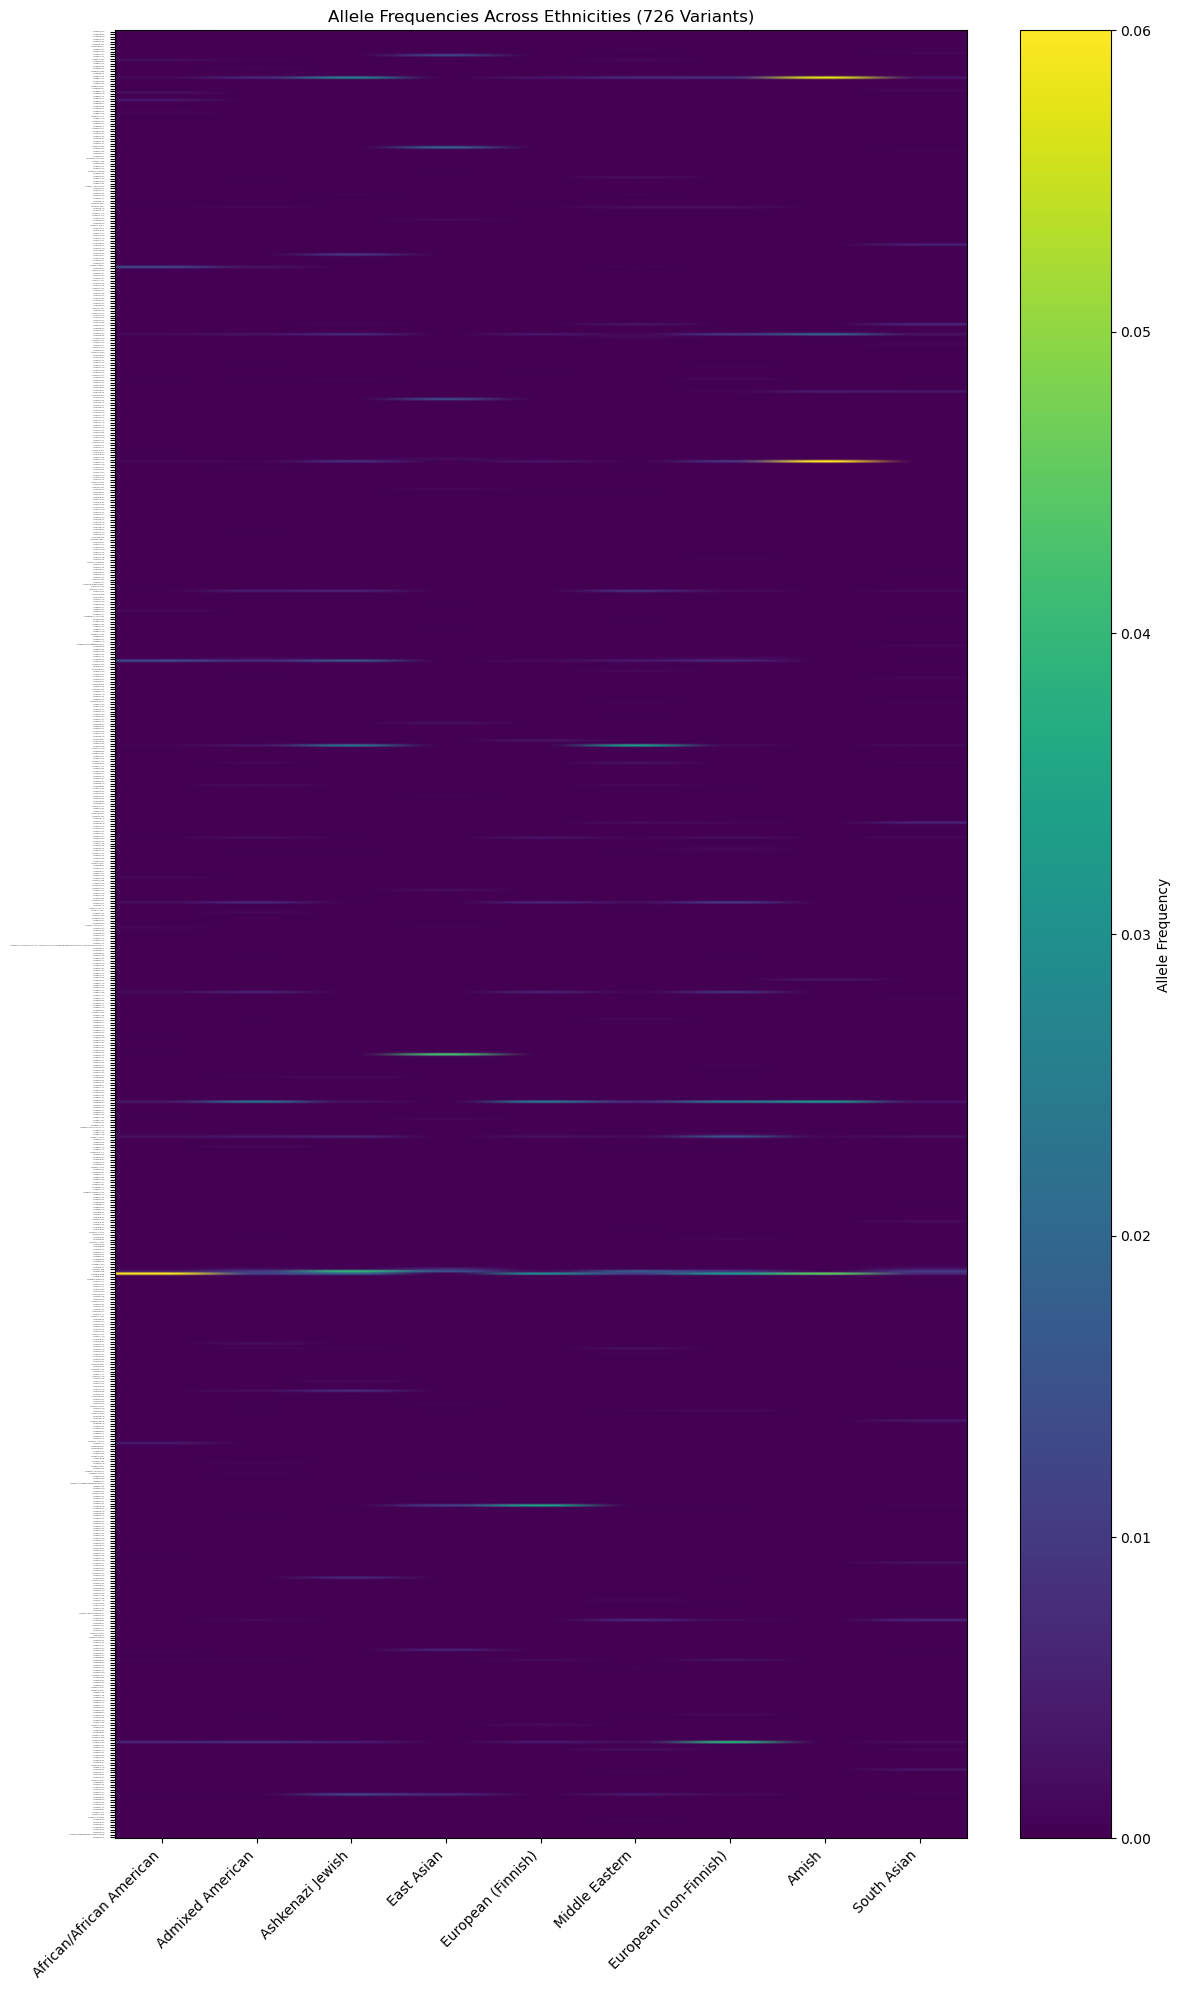

In [58]:
ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
frequency_columns = ["Allele Frequency " + eth for eth in ethnicities]

num_variants = 726
variant_labels = data_prep_path["gnomAD ID"]

frequency_data = data_prep_path[frequency_columns].values

cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=0.06)

fig, ax = plt.subplots(figsize=(12, 20))
im = ax.imshow(frequency_data, cmap=cmap, norm=norm, aspect='auto')
ax.set_xticks(np.arange(len(ethnicities)))
ax.set_xticklabels(ethnicities, rotation=45, ha="right")
ax.set_yticks(np.arange(len(variant_labels)))
ax.set_yticklabels(variant_labels, fontsize=1)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Allele Frequency")
ax.set_title(f"Allele Frequencies Across Ethnicities ({num_variants} Variants)")
fig.tight_layout()
plt.show()

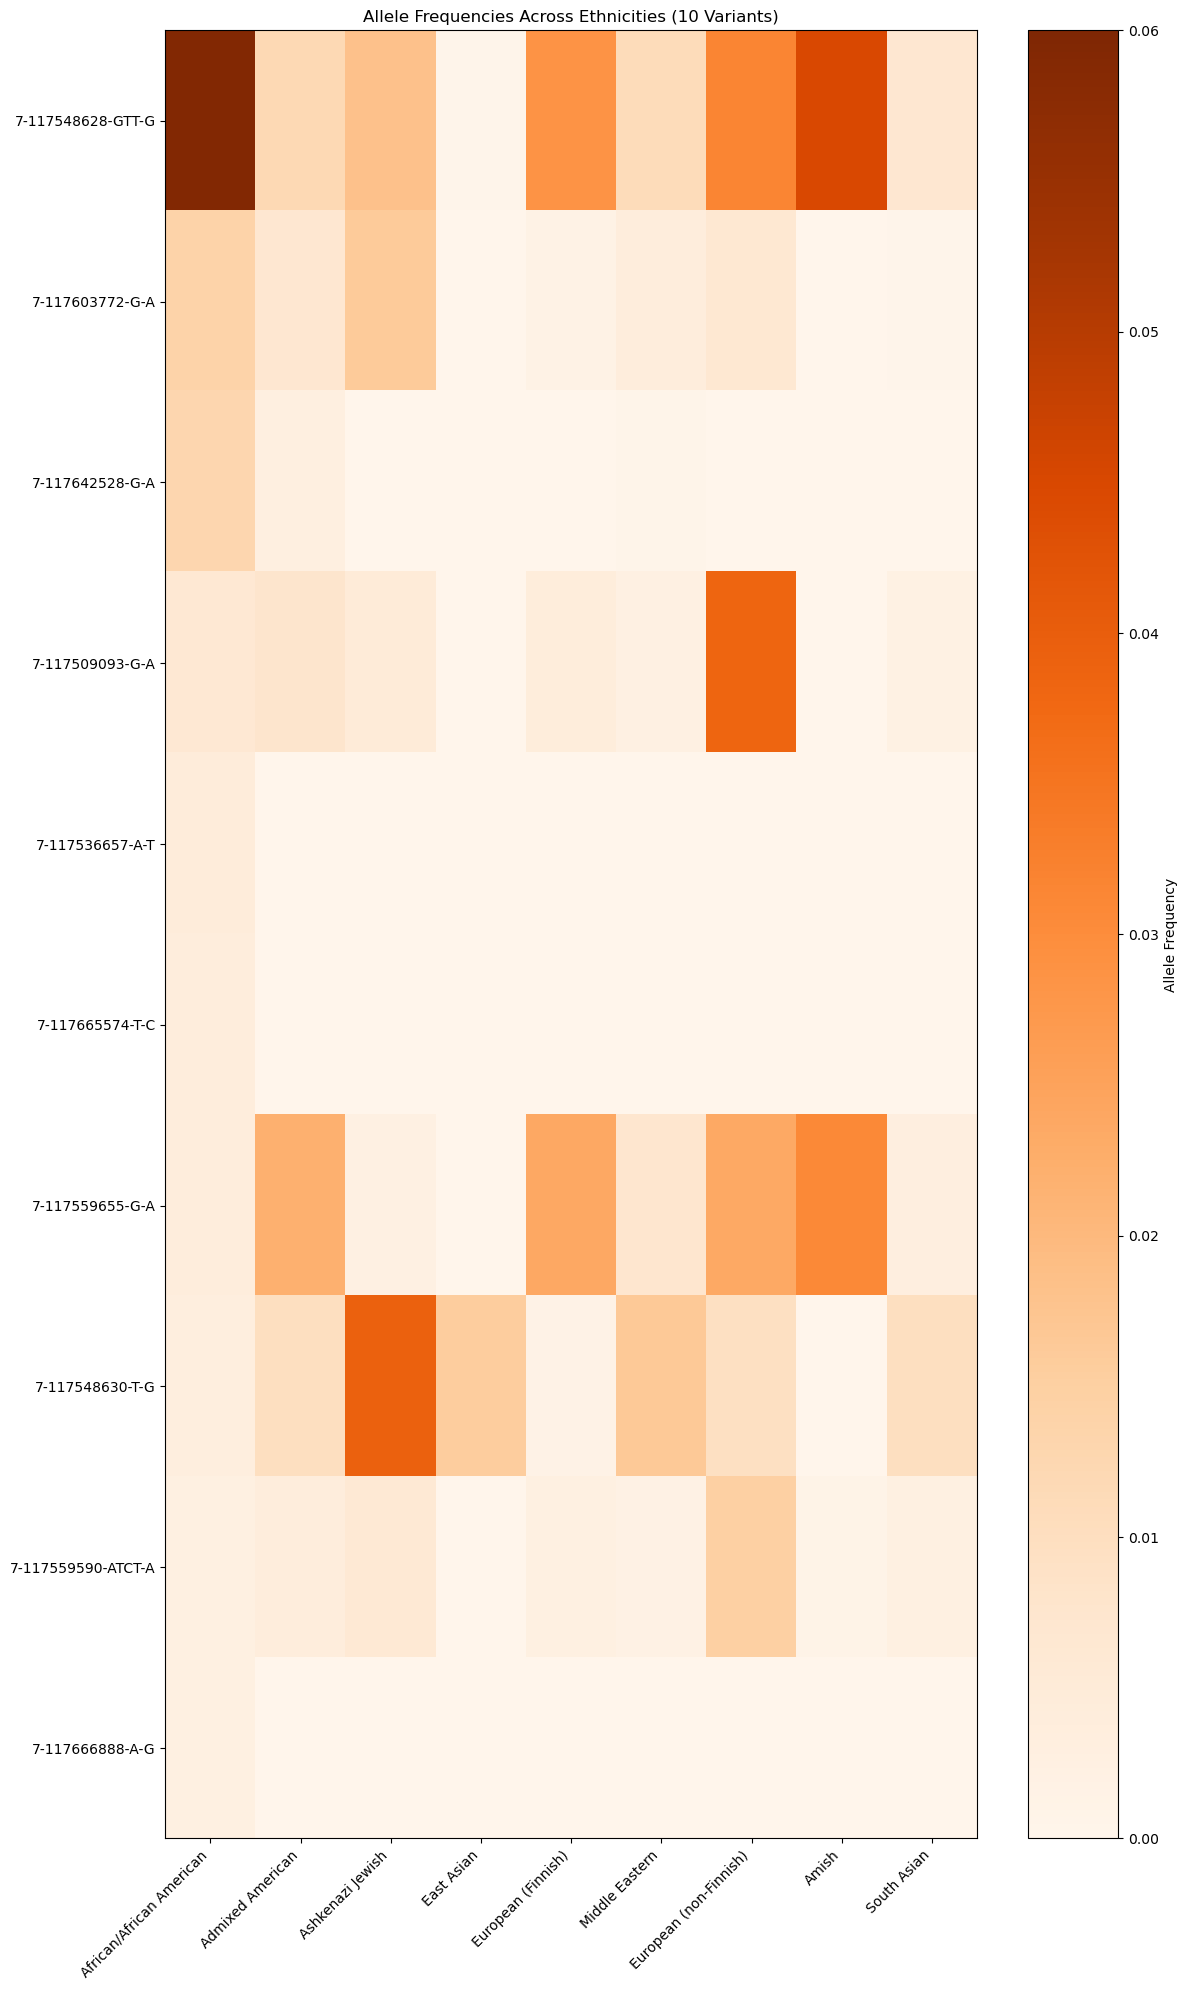

In [59]:
ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
frequency_columns = ["Allele Frequency " + eth for eth in ethnicities]

data_chop_af = data_sort_path_af.head(10)
frequency_data = data_chop_af[frequency_columns].values

num_variants = data_chop_af.shape[0]
variant_labels = data_chop_af["gnomAD ID"]

cmap = plt.cm.Oranges
norm = mcolors.Normalize(vmin=0, vmax=0.06)
fig, ax = plt.subplots(figsize=(12, 20))
im = ax.imshow(frequency_data, cmap=cmap, norm=norm, aspect='auto')
ax.set_xticks(np.arange(len(ethnicities)))
ax.set_xticklabels(ethnicities, rotation=45, ha="right")
ax.set_yticks(np.arange(len(variant_labels)))
ax.set_yticklabels(variant_labels, fontsize=10)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Allele Frequency")
ax.set_title(f"Allele Frequencies Across Ethnicities ({num_variants} Variants)")
fig.tight_layout()
plt.show()

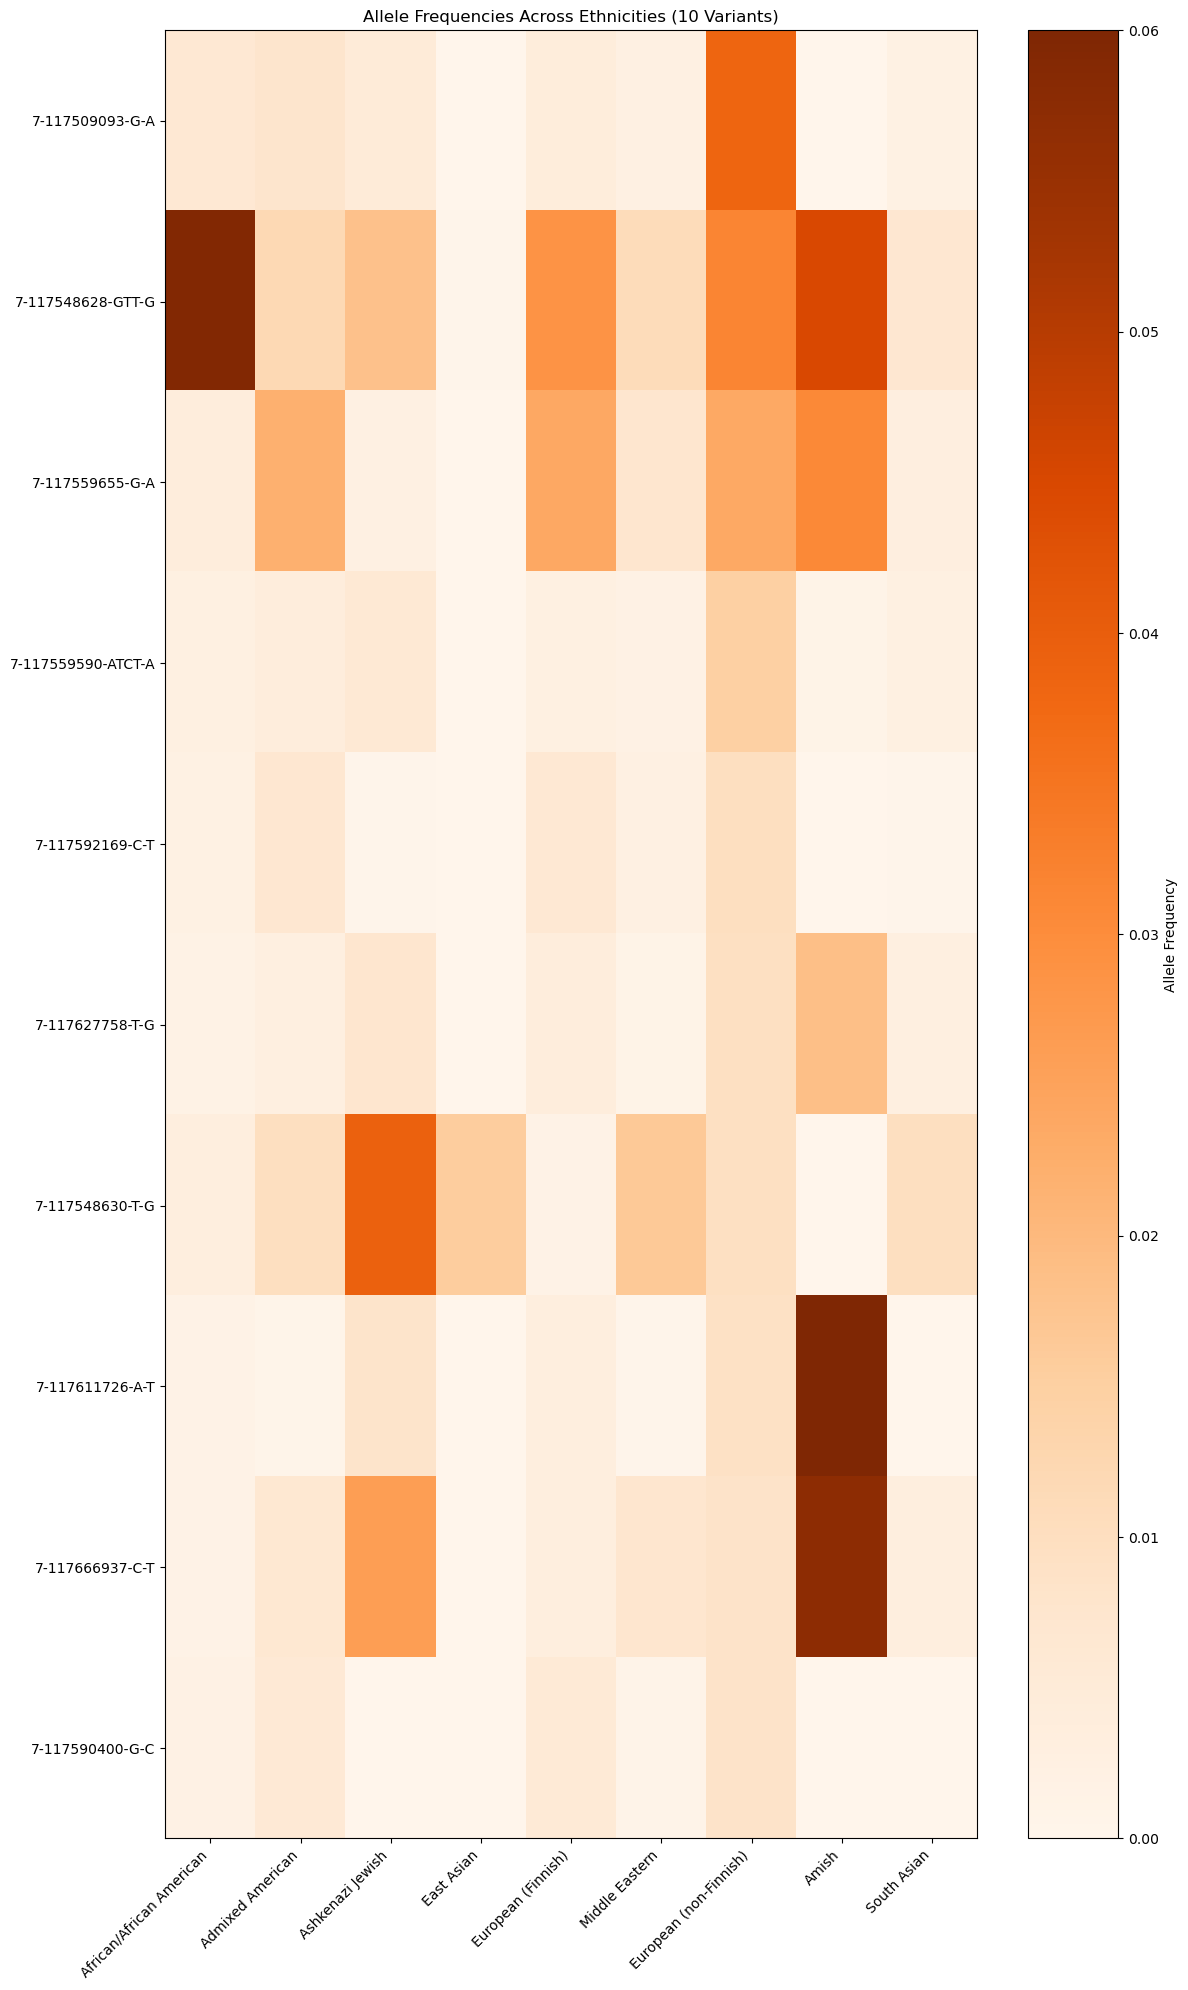

In [60]:
ethnicities = ["African/African American", "Admixed American", "Ashkenazi Jewish", "East Asian", "European (Finnish)", "Middle Eastern", "European (non-Finnish)", "Amish", "South Asian"]
frequency_columns = ["Allele Frequency " + eth for eth in ethnicities]

data_chop = data_sort_path_eu.head(10)
frequency_data = data_chop[frequency_columns].values

num_variants = data_chop.shape[0]
variant_labels = data_chop["gnomAD ID"]

cmap = plt.cm.Oranges
norm = mcolors.Normalize(vmin=0, vmax=0.06)
fig, ax = plt.subplots(figsize=(12, 20))
im = ax.imshow(frequency_data, cmap=cmap, norm=norm, aspect='auto')
ax.set_xticks(np.arange(len(ethnicities)))
ax.set_xticklabels(ethnicities, rotation=45, ha="right")
ax.set_yticks(np.arange(len(variant_labels)))
ax.set_yticklabels(variant_labels, fontsize=10)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Allele Frequency")

# Add title
ax.set_title(f"Allele Frequencies Across Ethnicities ({num_variants} Variants)")
fig.tight_layout()
plt.show()

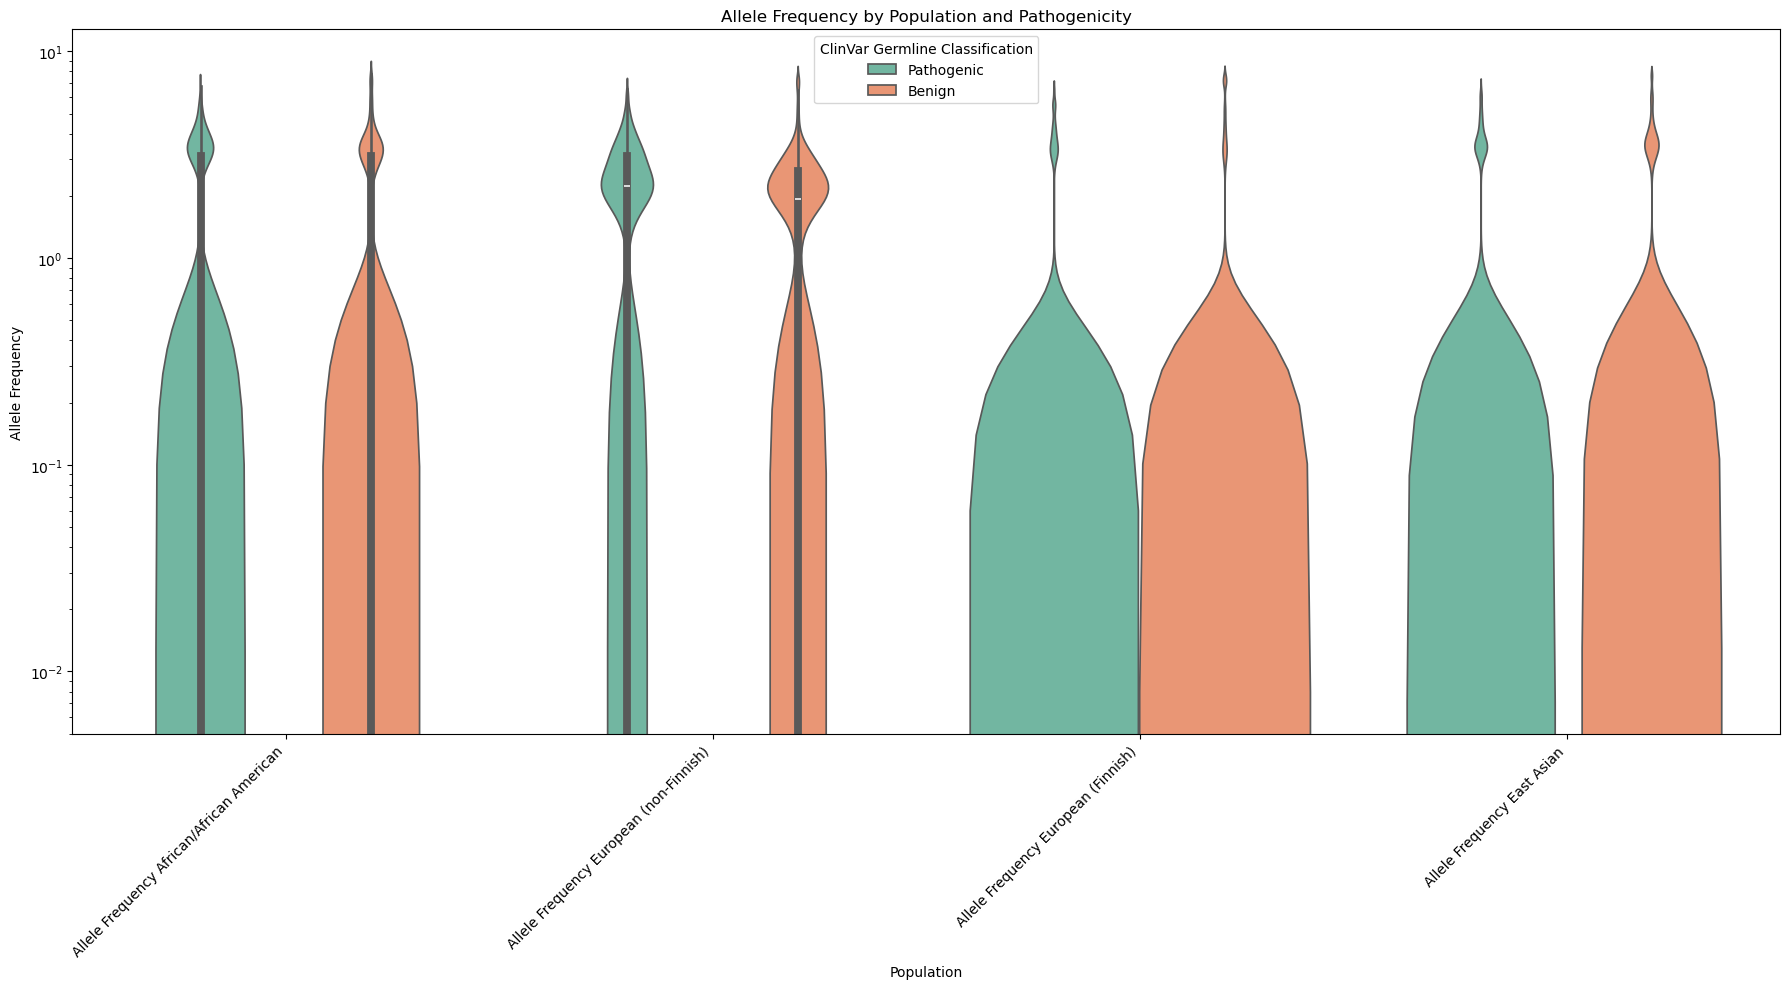

In [61]:
data__ = pd.concat([data_prep_path, data_prep_benign])
data_prep = pd.DataFrame({
    "gnomAD ID": data__["gnomAD ID"],
    "ClinVar Germline Classification": data__["ClinVar Germline Classification"],
    "Allele Frequency African/African American": 8+ np.log10(1e-8 + data__["Allele Frequency African/African American"]),
    "Allele Frequency European (non-Finnish)": 8+ np.log10(1e-8 + data__["Allele Frequency European (non-Finnish)"]),
    "Allele Frequency European (Finnish)": 8+ np.log10(1e-8 + data__["Allele Frequency European (Finnish)"]),
    "Allele Frequency East Asian": 8+ np.log10(1e-8 +  data__["Allele Frequency East Asian"])
})

#Melt dataframe
df_melted = data_prep.melt(
    id_vars=['ClinVar Germline Classification'],
    value_vars=[
        'Allele Frequency African/African American',
        'Allele Frequency European (non-Finnish)',
        'Allele Frequency European (Finnish)',
        'Allele Frequency East Asian'],
    var_name='Population',  # Name for the new column containing population names
    value_name='Allele Frequency'  # Name for the new column containing allele frequencies
)



plt.figure(figsize=(18, 10))
sns.violinplot(
    x='Population', 
    y='Allele Frequency', 
    hue='ClinVar Germline Classification',  # Color the violins by Pathogenicity
    data=df_melted, 
    palette='Set2',
)
plt.title('Allele Frequency by Population and Pathogenicity')
plt.xlabel('Population') 
plt.ylabel('Allele Frequency') 
plt.yscale('log')
#plt.ylim(0.00001, 0.01)  # Set y-axis limits for better visibility
plt.xticks(rotation=45,ha='right') 
plt.tight_layout() 
plt.show()


In [62]:
import pandas as pd
import numpy as np

# Assuming your 'data_prep' DataFrame is already loaded and contains the relevant columns
# If not, you would load it like this:
# data_prep = pd.read_csv("your_data.csv")

# Let's create some example data resembling your structure (with the new columns)
num_variants = 10 # Reduced for brevity
data = {
    "Transcript Consequence": data_chop_af["Transcript Consequence"],
    "Protein Consequence": data_chop_af["Protein Consequence"],
    "Allele Frequency African/African American": data_chop_af["Allele Frequency African/African American"].values,
    "Allele Frequency Europe (non-Finnish)": data_chop_af["Allele Frequency European (non-Finnish)"].values,
    "ID": data_chop_af["gnomAD ID"].values,
}
data_prep = pd.DataFrame(data)

# Define the column names for Africa and Europe
africa_col = "Allele Frequency African/African American"
europe_col = "Allele Frequency Europe (non-Finnish)"

# Define the variant identification columns
variant_id_cols = ["Transcript Consequence", "Protein Consequence"]
top_n = 5 # Let's look at the top 5 for brevity

# --- Find the most frequent variants in Africa ---
most_frequent_africa = data_prep.sort_values(by=africa_col, ascending=False)

print(f"Top {top_n} most frequent variants in Africa (based on '{africa_col}'):")
print(most_frequent_africa[variant_id_cols + [africa_col]])

# --- Find the most frequent variants in Europe ---
most_frequent_europe = data_prep.sort_values(by=europe_col, ascending=False)

print(f"\nTop {top_n} most frequent variants in Europe (based on '{europe_col}'):")
print(most_frequent_europe[variant_id_cols + [europe_col]]) 

# --- If you want to see variants highly frequent in BOTH populations ---
frequency_threshold = 0.8
highly_frequent_in_both = data_prep[
    (data_prep[africa_col] > frequency_threshold) & (data_prep[europe_col] > frequency_threshold)
]

print(f"\nVariants with allele frequency > {frequency_threshold} in both Africa and Europe:")
print(highly_frequent_in_both[variant_id_cols + [africa_col, europe_col]]) 

Top 5 most frequent variants in Africa (based on 'Allele Frequency African/African American'):
     Transcript Consequence Protein Consequence  \
3991     c.1210-7_1210-6del                 NaN   
2223              c.2898G>A         p.Thr966Thr   
984               c.3808G>A        p.Asp1270Asn   
5412               c.224G>A          p.Arg75Gln   
4532               c.853A>T         p.Ile285Phe   
360            c.4242+10T>C                 NaN   
3663              c.1584G>A         p.Glu528Glu   
3984           c.1210-11T>G                 NaN   
3716         c.1521_1523del         p.Phe508del   
252               c.*223A>G                 NaN   

      Allele Frequency African/African American  
3991                                   0.059210  
2223                                   0.013664  
984                                    0.012786  
5412                                   0.006293  
4532                                   0.004372  
360                                    0.00